In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

#Data Load

In [2]:
input_file='604.Isis.WHT.Red.txt'#astronomicalobsevations 
data_0=pd.read_table(input_file)#PandasDataFrameOriginalData
data_1=data_0.copy()#DataFrameForCalculations
data_1.head()
#data_1.describe()

,Pos,Slit,X,Y,Archivo,Center,ErrC,Width,ErrW,Peak,...,Line.3,ErrL.3,Center.4,ErrC.4,Width.4,ErrW.4,Peak.4,ErrP.4,Line.4,ErrL.4
0,1,1,199.81,19.6,604R1_778-001004.xlsx,6560.006,0.419,3.152,0.760,-19.79,...,6.9110,9.8280,6724.307,1.618,2.765,2.312,-3.363,3.125,-9.896,-12.140
1,2,1,198.47,19.6,604R1_778-005008.xlsx,6559.806,0.427,3.849,1.260,-18.81,...,1.5190,0.0000,6726.936,0.812,2.295,1.196,4.827,3.316,11.790,8.589
2,3,1,197.13,19.6,604R1_778-009012.xlsx,6565.844,6.249,28.117,18.167,-16.44,...,-7.2300,-6.1340,6723.383,0.606,1.294,0.730,2.938,4.510,4.045,7.195
3,4,1,195.79,19.6,604R1_778-013016.xlsx,6563.614,1.206,22.266,4.208,-14.54,...,-0.1011,-0.5723,6725.799,0.636,1.021,0.724,-8.003,6.818,-8.701,-7.102
4,5,1,194.45,19.6,604R1_778-017020.xlsx,6560.380,0.479,3.310,0.990,-16.68,...,-20.7700,-12.5400,6728.612,0.685,3.266,1.290,-4.778,3.152,-16.610,-9.432


In [3]:
#Constant
c=299792.459#km/s
pc=4.16
#Iraf
corrhelio=25.68#km/s
#Literature
T=8350#K
#Theory Lambda
lha=6562.8#Angstroms
ls=6731#Angstroms
ln=6583#Angstroms
#Atomic Weights
Hw=1.00794#
Nw=14.0067
Sw=32.065#
#Obervtions
SigmaInstH=18#km/s
SigmaInstN=12#km/s
SigmaInstS=15#km/s

Filter on Data

In [4]:
m=(data_1.X<145)&(data_1.X>65)
data=data_1[m]
dataH=data

Emission Lines

In [5]:
dataHa=dataH[['X','Y','Center','Peak','Width']]
dataHa.describe()

,X,Y,Center,Peak,Width
count,600.000000,600.000000,600.000000,600.000000,600.000000
mean,105.269000,9.390000,6556.764095,2277.239467,1.040497
std,23.243169,6.256047,0.228108,3750.107456,0.481844
min,65.710000,0.000000,6556.161000,27.150000,-0.966000
25%,85.485000,4.000000,6556.593500,281.925000,0.933750
50%,105.270000,9.000000,6556.767500,1017.500000,1.034500
75%,125.045000,15.000000,6556.896000,2403.500000,1.183250
max,144.830000,19.600000,6557.740000,30960.000000,3.215000


In [6]:
dataN=dataH[['X','Y','Center.2','Peak.2','Width.2']]
dataN.describe()

,X,Y,Center.2,Peak.2,Width.2
count,600.000000,600.000000,600.000000,600.000000,600.000000
mean,105.269000,9.390000,6577.496515,333.340168,1.307032
std,23.243169,6.256047,0.679362,440.691257,1.698212
min,65.710000,0.000000,6576.473000,7.410000,-0.907000
25%,85.485000,4.000000,6577.239750,65.727500,0.822750
50%,105.270000,9.000000,6577.393500,192.300000,0.939500
75%,125.045000,15.000000,6577.562750,413.950000,1.147000
max,144.830000,19.600000,6583.311000,3893.000000,13.099000


In [7]:
dataS=dataH[['X','Y','Center.4','Peak.4','Width.4']]
dataS.describe()

,X,Y,Center.4,Peak.4,Width.4
count,600.000000,600.000000,600.000000,600.000000,600.000000
mean,105.269000,9.390000,6725.251657,168.994135,0.545097
std,23.243169,6.256047,0.601068,201.362479,11.093384
min,65.710000,0.000000,6722.844000,-1343.000000,-265.259000
25%,85.485000,4.000000,6725.016750,40.177500,0.835500
50%,105.270000,9.000000,6725.171500,113.600000,0.957000
75%,125.045000,15.000000,6725.326000,231.750000,1.174250
max,144.830000,19.600000,6731.423000,1568.000000,7.499000


Halpha Emission Line

(61.74180558187195,
 148.79819441812805,
 -1.0150488574011365,
 20.615048857401142)

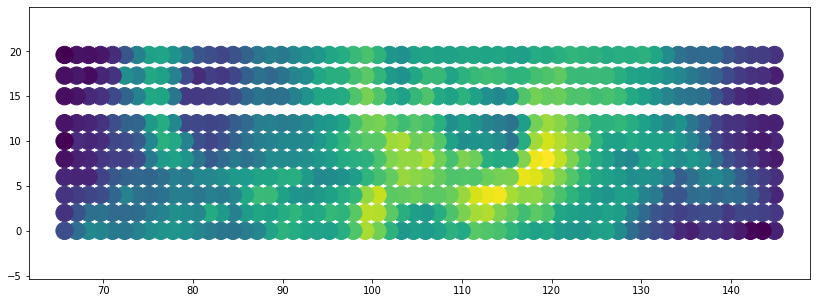

In [8]:
fig, ax = plt.subplots(figsize=(14,5))
plt.scatter(dataHa.X,dataHa.Y,c=np.log10(dataHa.Peak), s=300)
plt.axis('equal')

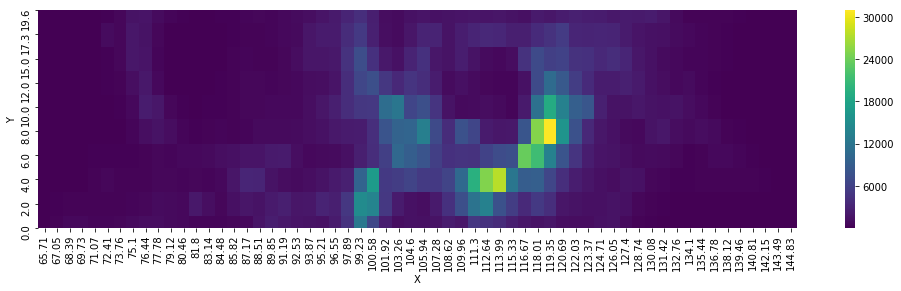

In [9]:
dataHf=(dataHa.round(2)).pivot(index='Y', columns='X', values='Peak')
fig, ax = plt.subplots(figsize=(17, 4))
sns.heatmap(dataHf, cmap="viridis")
plt.gca().invert_yaxis()

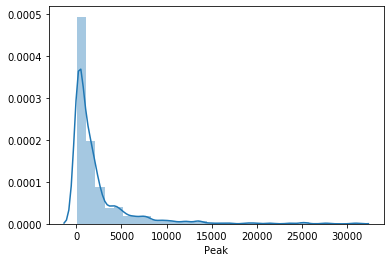

In [10]:
sns.distplot(dataHa.Peak,bins=30)

#Radial velocity 

$$\dfrac{\lambda_{obs}-\lambda}{\lambda}*c$$

In [11]:
RVHao=c*(dataHa.Center-lha)/lha

In [12]:
RVHa=RVHao+corrhelio
RVHa.describe()

count    600.000000
mean    -250.043594
std       10.420092
min     -277.593319
25%     -257.836471
50%     -249.888052
75%     -244.018098
max     -205.463695
Name: Center, dtype: float64

In [13]:
dataHa=dataHa.assign(RV=RVHa.values)
dataHa

,X,Y,Center,Peak,Width,RV
41,144.83,19.6,6556.792,73.97,0.780,-248.768878
42,143.49,19.6,6556.771,94.17,0.926,-249.728170
43,142.15,19.6,6556.704,101.40,0.970,-252.788768
44,140.81,19.6,6556.538,118.20,1.154,-260.371743
45,139.46,19.6,6556.321,180.00,1.250,-270.284427
...,...,...,...,...,...,...
1446,71.07,0.0,6557.342,471.50,0.889,-223.644563
1447,69.73,0.0,6557.338,631.80,0.871,-223.827285
1448,68.39,0.0,6557.338,729.80,0.857,-223.827285
1449,67.05,0.0,6557.318,339.00,0.910,-224.740897


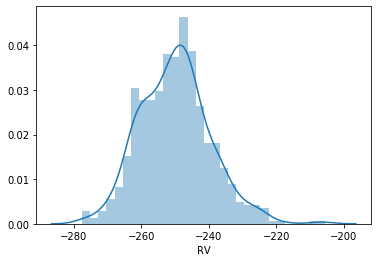

In [14]:
sns.distplot(dataHa.RV,bins=30)

(61.74180558187195,
 148.79819441812805,
 -1.0150488574011365,
 20.615048857401142)

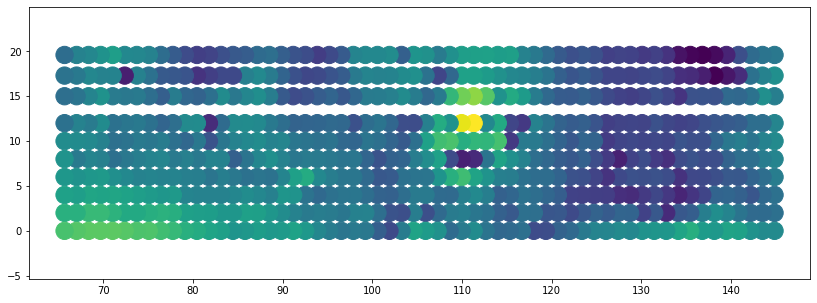

In [15]:
fig, ax = plt.subplots(figsize=(14,5))
plt.scatter(dataHa.X,dataHa.Y,c=dataHa.RV, s=300)
plt.axis('equal')

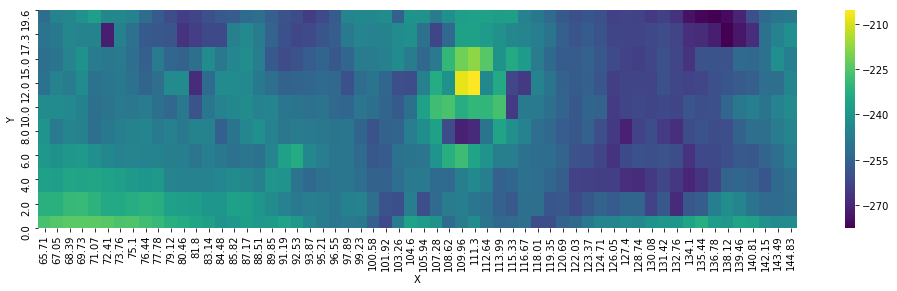

In [16]:
dataHrv=(dataHa.round(2)).pivot(index='Y', columns='X', values='RV')
fig, ax = plt.subplots(figsize=(17, 4))
sns.heatmap(dataHrv, cmap="viridis")
plt.gca().invert_yaxis()

#Width

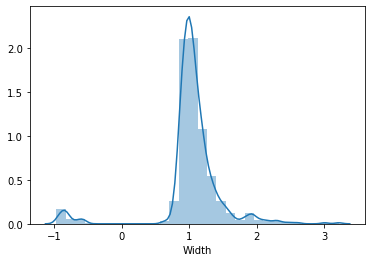

In [17]:
sns.distplot(dataHa.Width,bins=30)

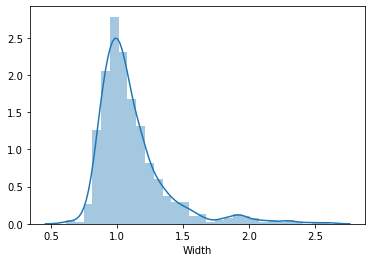

In [18]:
m2=(dataHa.Width<3)&(dataHa.Width>0)
sns.distplot(dataHa[m2].Width,bins=30)

(61.74180558187195,
 148.79819441812805,
 -1.0150488574011365,
 20.615048857401142)

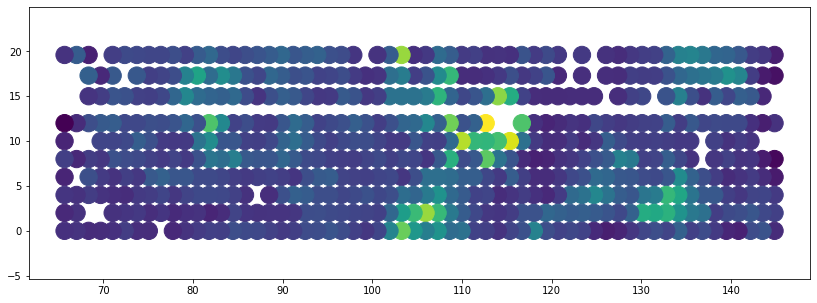

In [19]:
fig, ax = plt.subplots(figsize=(14,5))
plt.scatter(dataHa[m2].X,dataHa[m2].Y,c=dataHa[m2].Width, s=300)
plt.axis('equal')

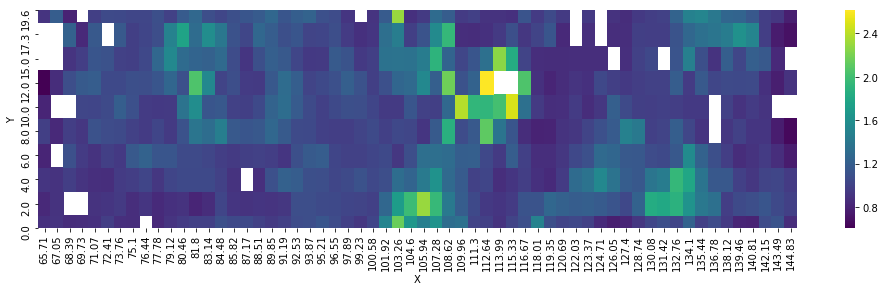

In [20]:
dataHw=(dataHa[m2].round(2)).pivot(index='Y', columns='X', values='Width')
fig, ax = plt.subplots(figsize=(17, 4))
sns.heatmap(dataHw, cmap="viridis")
plt.gca().invert_yaxis()


#Sigma Disp

$$\sigma_{disp}^{2}=\sigma_{obs}^{2}-\sigma_{inst}^{2}-\sigma_{therm}^{2}$$

Sigma obs

In [21]:
a=0.6006/1.414
SigmaObs=a*(dataHa[m2].Width/lha)*c
SigmaObs

41      15.134290
42      17.967119
43      18.820848
44      22.390988
45      24.253670
          ...    
1446    17.249210
1447    16.899957
1448    16.628316
1449    17.656672
1450    17.307419
Name: Width, Length: 573, dtype: float64

Sigma therm

In [22]:
SigmaTerm=np.sqrt(166.3*(T/10000)/(Hw*1.414))
SigmaTerm

9.870685562593978

In [23]:
SigmaDisp=np.sqrt(SigmaObs**2-SigmaTerm**2-SigmaInstH**2)
SigmaDisp.describe()

/home/zalenovo/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


count    265.000000
mean      13.223510
std        8.910126
min        0.882001
25%        6.827252
50%       11.067999
75%       16.887080
max       46.272917
Name: Width, dtype: float64

In [24]:
dataHs=dataHa[m2]
dataHs=dataHs.assign(SigmaD=SigmaDisp.values)
dataHs.describe()

,X,Y,Center,Peak,Width,RV,SigmaD
count,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,265.000000
mean,105.520611,9.246248,6556.763175,2333.966597,1.113440,-250.085642,13.223510
std,22.820719,6.242389,0.227165,3816.888874,0.273027,10.377044,8.910126
min,65.710000,0.000000,6556.161000,27.150000,0.614000,-277.593319,0.882001
25%,85.820000,4.000000,6556.599000,298.800000,0.951000,-257.585228,6.827252
50%,105.940000,8.000000,6556.767000,1074.000000,1.046000,-249.910892,11.067999
75%,124.710000,15.000000,6556.894000,2405.000000,1.187000,-244.109459,16.887080
max,144.830000,19.600000,6557.740000,30960.000000,2.609000,-205.463695,46.272917


/home/zalenovo/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/zalenovo/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/home/zalenovo/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/zalenovo/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


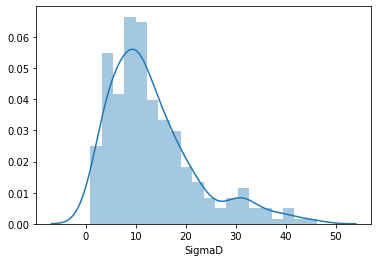

In [25]:
sns.distplot(dataHs.SigmaD,bins=20)

(65, 145)

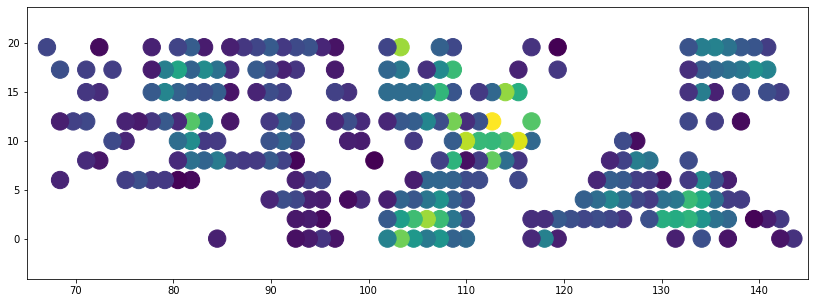

In [26]:
fig, ax = plt.subplots(figsize=(14,5))
plt.scatter(dataHs.X,dataHs.Y,c=dataHs.SigmaD, s=300)
plt.axis('equal')
ax.set_xlim(65,145)


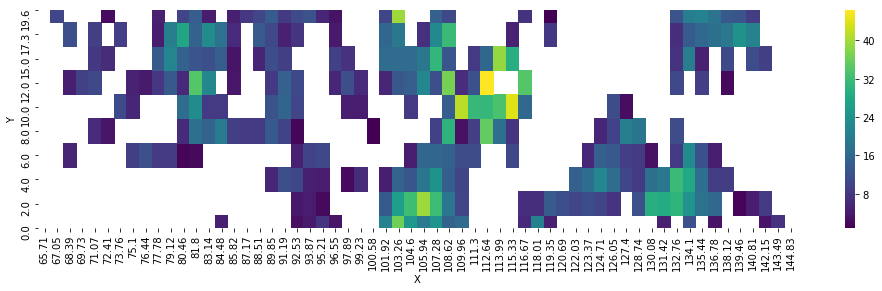

In [27]:
dataHsg=(dataHs.round(2)).pivot(index='Y', columns='X', values='SigmaD')
fig, ax = plt.subplots(figsize=(17, 4))
sns.heatmap(dataHsg, cmap="viridis")
plt.gca().invert_yaxis()

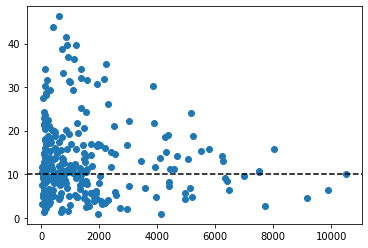

In [28]:
plt.scatter(dataHs.Peak,dataHs.SigmaD)
plt.axhline(y=10, color='k', linestyle='--')

[NII] Emission Line


In [29]:
dataN

,X,Y,Center.2,Peak.2,Width.2
41,144.83,19.6,6579.214,12.010,9.234
42,143.49,19.6,6581.037,9.836,11.762
43,142.15,19.6,6577.277,24.740,1.265
44,140.81,19.6,6577.335,30.080,0.953
45,139.46,19.6,6576.976,32.900,1.279
...,...,...,...,...,...
1446,71.07,0.0,6577.965,87.200,1.074
1447,69.73,0.0,6578.028,159.500,0.743
1448,68.39,0.0,6577.995,167.600,0.839
1449,67.05,0.0,6577.959,99.180,0.867


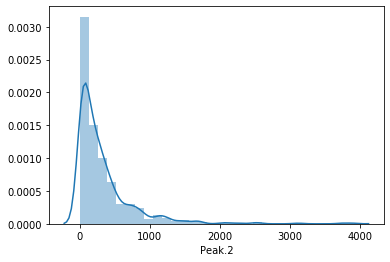

In [30]:
sns.distplot(dataN["Peak.2"],bins=30)

(61.74180558187195,
 148.79819441812805,
 -1.0150488574011365,
 20.615048857401142)

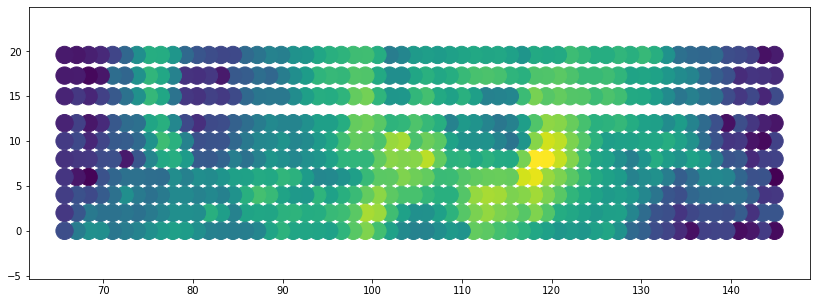

In [31]:
fig, ax = plt.subplots(figsize=(14,5))
plt.scatter(dataN.X,dataN.Y,c=np.log10(dataN["Peak.2"]), s=300)
plt.axis('equal')

In [32]:
#mnf=(dataN["Peak.2"]<35000)&(dataN["Peak.2"]>200)
#sns.distplot(dataN["Peak.2"],bins=30)

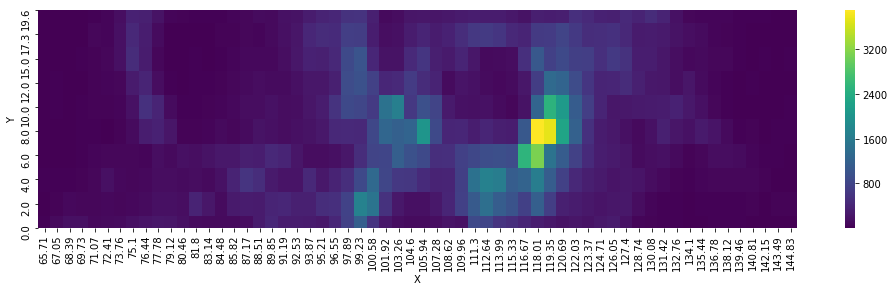

In [33]:
dataNf=(dataN.round(2)).pivot(index='Y', columns='X', values='Peak.2')
fig, ax = plt.subplots(figsize=(17, 4))
sns.heatmap(dataNf, cmap="viridis")
plt.gca().invert_yaxis()


In [34]:
ln

6583

#Radial velocity 

In [35]:
RVNo=c*((dataN["Center.2"]-ln)/ln)
RVNo.describe()

count    600.000000
mean    -250.630913
std       30.938421
min     -297.242197
25%     -262.324094
50%     -255.322258
75%     -247.614545
max       14.163065
Name: Center.2, dtype: float64

In [36]:
RVN=RVNo+corrhelio
RVN.describe()

count    600.000000
mean    -224.950913
std       30.938421
min     -271.562197
25%     -236.644094
50%     -229.642258
75%     -221.934545
max       39.843065
Name: Center.2, dtype: float64

In [37]:
dataN=dataN.assign(RV=RVN.values)


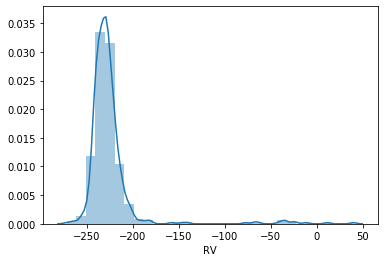

In [38]:
sns.distplot(dataN.RV,bins=30)

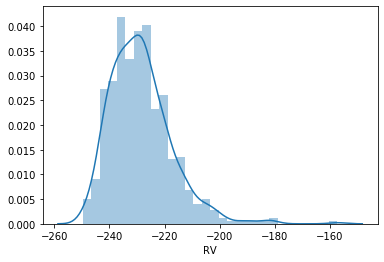

In [39]:
mn=(dataN.RV<-150)&(dataN.RV>-250)
sns.distplot(dataN[mn].RV,bins=30)

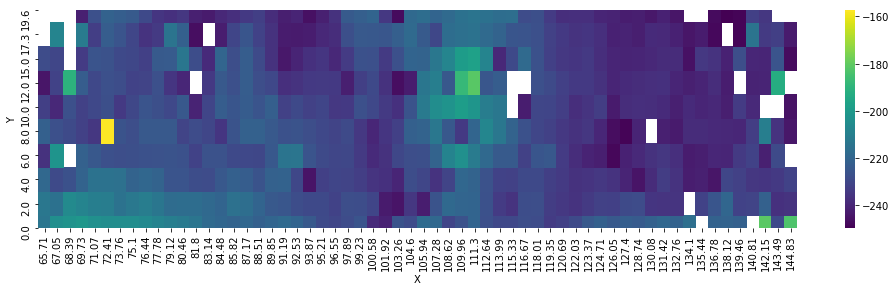

In [40]:
dataNrv=(dataN[mn].round(2)).pivot(index='Y', columns='X', values='RV')
fig, ax = plt.subplots(figsize=(17, 4))
sns.heatmap(dataNrv, cmap="viridis")
plt.gca().invert_yaxis()

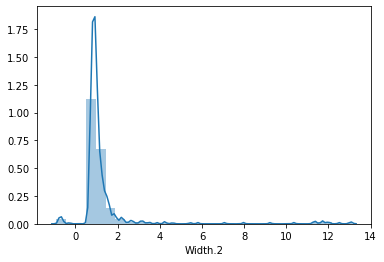

In [41]:
sns.distplot(dataN["Width.2"],bins=30)

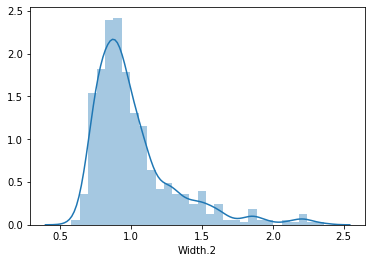

In [42]:
mns=(dataN["Width.2"]<2.5)&(dataN["Width.2"]>0)
dataN=dataN[mns]
sns.distplot(dataN["Width.2"][mns],bins=30)

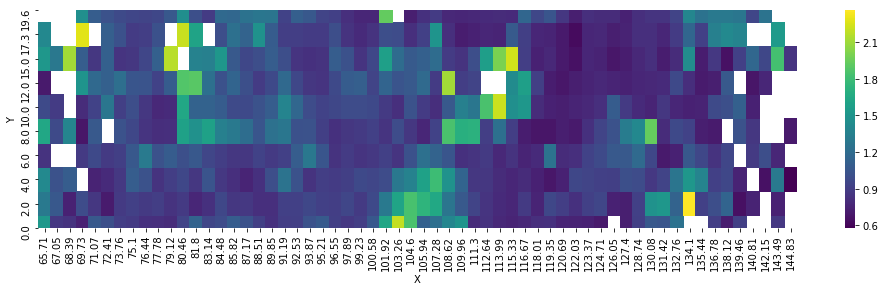

In [43]:
dataNs=(dataN.round(2)).pivot(index='Y', columns='X', values='Width.2')
fig, ax = plt.subplots(figsize=(17, 4))
sns.heatmap(dataNs, cmap="viridis")
plt.gca().invert_yaxis()

Sigma Disp

In [44]:
SigmaObsN=a*(dataN["Width.2"]/lha)*c
SigmaObsN

43      24.544714
44      18.490998
45      24.816355
46      25.262623
47      25.165608
          ...    
1446    20.838753
1447    14.416382
1448    16.279063
1449    16.822346
1450    29.608880
Name: Width.2, Length: 556, dtype: float64

In [45]:
SigmaTermN=np.sqrt(166.3*(T/10000)/(Nw*1.414))
SigmaTermN

2.6478705184531206

In [46]:
SigmaDispN=np.sqrt(SigmaObsN**2-SigmaTermN**2-SigmaInstN**2)
SigmaDispN.describe()

count    555.000000
mean      14.875195
std        7.086527
min        0.561014
25%       10.212506
50%       13.134068
75%       17.450517
max       44.111200
Name: Width.2, dtype: float64

In [47]:
dataN=dataN.assign(SigmaD=SigmaDispN.values)
dataN.describe()

,X,Y,Center.2,Peak.2,Width.2,RV,SigmaD
count,556.000000,556.00000,556.000000,556.000000,556.000000,556.000000,555.000000
mean,104.615360,9.30036,6577.392372,356.946349,1.016191,-229.693613,14.875195
std,22.086867,6.22152,0.237191,449.198613,0.296842,10.801791,7.086527
min,65.710000,0.00000,6576.612000,10.910000,0.577000,-265.232081,0.561014
25%,85.820000,4.00000,6577.232500,81.297500,0.823000,-236.974262,10.212506
50%,104.600000,8.00000,6577.381500,221.300000,0.926500,-230.188742,13.134068
75%,123.370000,15.00000,6577.521250,435.825000,1.098500,-223.824471,17.450517
max,144.830000,19.60000,6578.451000,3893.000000,2.360000,-181.483284,44.111200


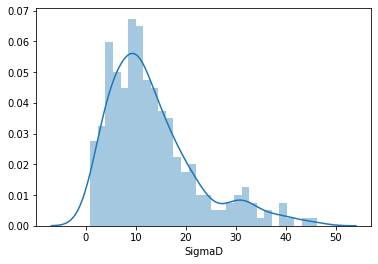

In [48]:
sns.distplot(dataHs.SigmaD,bins=30)

(65, 145)

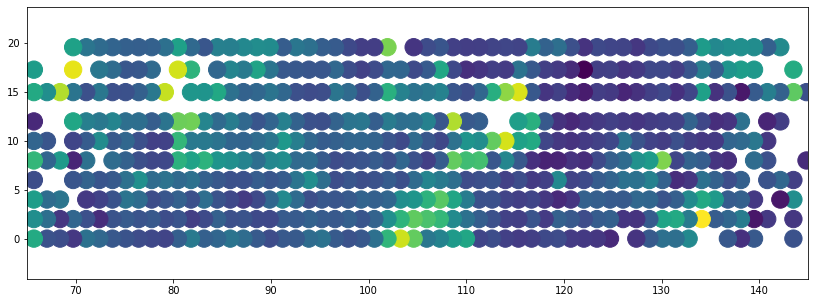

In [49]:
fig, ax = plt.subplots(figsize=(14,5))
plt.scatter(dataN.X,dataN.Y,c=dataN.SigmaD, s=300)
plt.axis('equal')
ax.set_xlim(65,145)

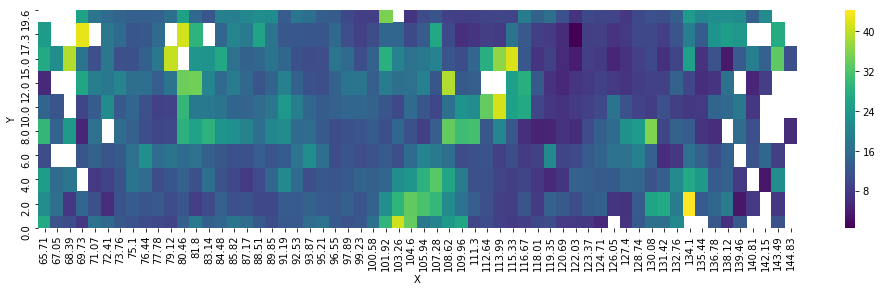

In [50]:
dataNsd=(dataN.round(2)).pivot(index='Y', columns='X', values='SigmaD')
fig, ax = plt.subplots(figsize=(17, 4))
sns.heatmap(dataNsd, cmap="viridis")
plt.gca().invert_yaxis()


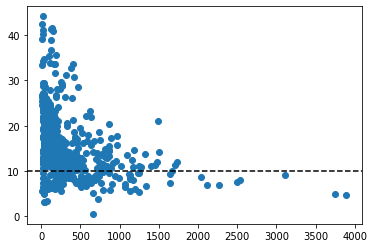

In [51]:
plt.scatter(dataN["Peak.2"],dataN.SigmaD)
plt.axhline(y=10, color='k', linestyle='--')

[SII] Emission Line


/home/zalenovo/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


(61.74180558187195,
 148.79819441812805,
 -1.0150488574011365,
 20.615048857401142)

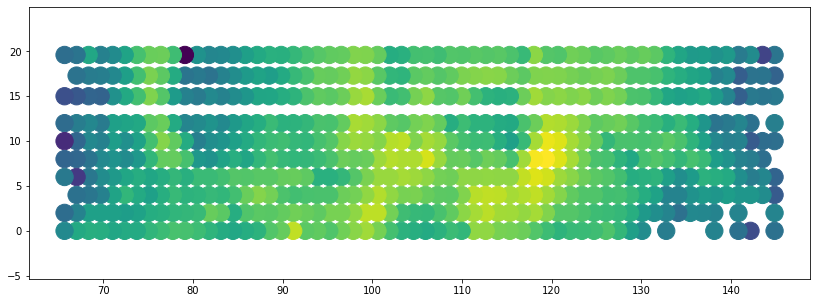

In [52]:
fig, ax = plt.subplots(figsize=(14,5))
plt.scatter(dataS.X,dataS.Y,c=np.log10(dataS["Peak.4"]), s=300)
plt.axis('equal')

In [53]:
#dataS["Peak.4"]

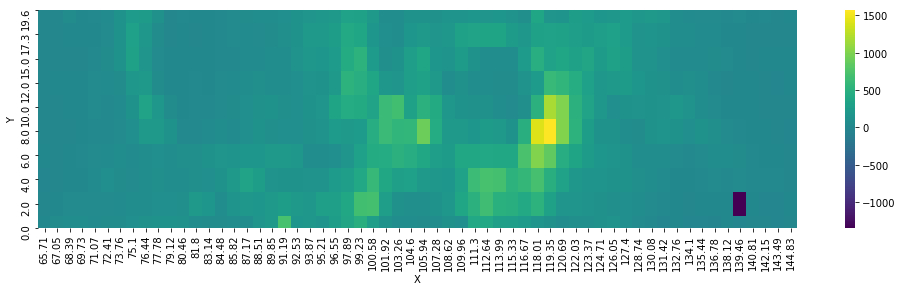

In [54]:
dataSf=(dataS.round(2)).pivot(index='Y', columns='X', values='Peak.4')
fig, ax = plt.subplots(figsize=(17, 4))
sns.heatmap(dataSf, cmap="viridis")
plt.gca().invert_yaxis()


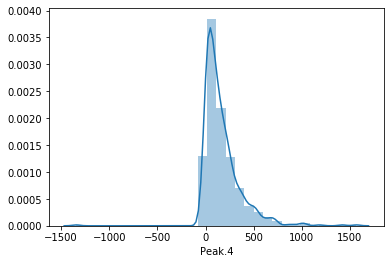

In [55]:
sns.distplot(dataS["Peak.4"],bins=30)

#Radial velocity 

In [56]:
RVSo=c*(dataS["Center.4"]-ls)/ls
RVS=RVSo+corrhelio
RVS.describe()

count    600.000000
mean    -230.345848
std       26.771015
min     -337.580629
25%     -240.808372
50%     -233.915951
75%     -227.034665
max       44.520025
Name: Center.4, dtype: float64

In [57]:
dataS=dataS.assign(RV=RVS.values)
dataS

,X,Y,Center.4,Peak.4,Width.4,RV
41,144.83,19.6,6725.089,10.340,0.717,-237.590424
42,143.49,19.6,6725.229,2.199,1.365,-231.354955
43,142.15,19.6,6725.064,21.540,0.729,-238.703901
44,140.81,19.6,6724.876,12.650,0.727,-247.077245
45,139.46,19.6,6724.784,35.230,1.066,-251.174840
...,...,...,...,...,...,...
1446,71.07,0.0,6725.793,54.330,0.828,-206.234921
1447,69.73,0.0,6725.791,69.700,0.932,-206.323999
1448,68.39,0.0,6725.755,72.650,0.829,-207.927406
1449,67.05,0.0,6725.791,60.920,0.850,-206.323999


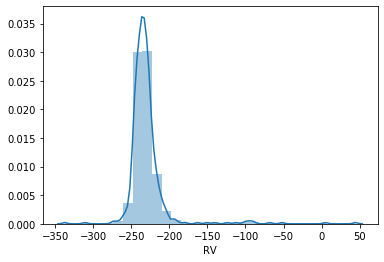

In [58]:
sns.distplot(dataS.RV,bins=30)

(61.74180558187195,
 148.79819441812805,
 -1.0150488574011365,
 20.615048857401142)

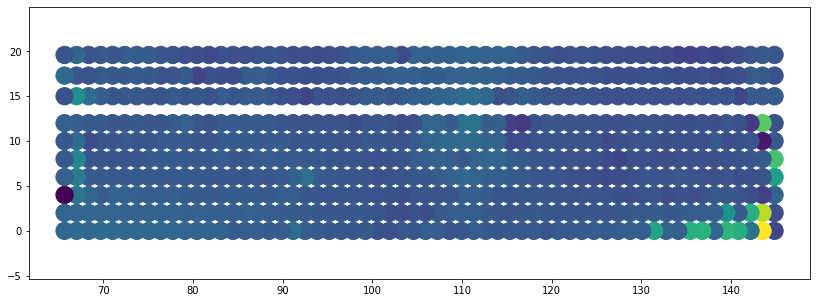

In [59]:
fig, ax = plt.subplots(figsize=(14,5))
plt.scatter(dataS.X,dataS.Y,c=dataS.RV, s=300)
plt.axis('equal')

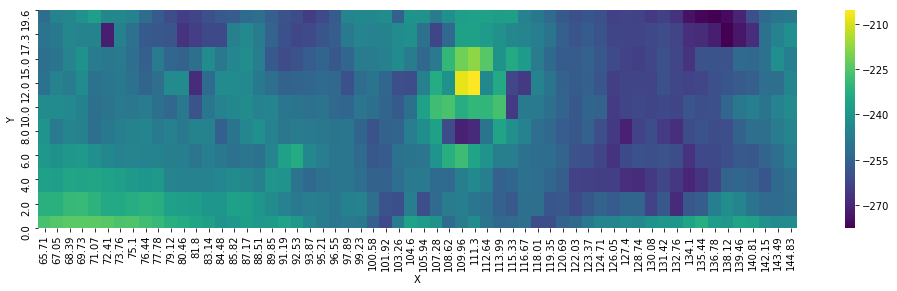

In [60]:
dataSrv=(dataHa.round(2)).pivot(index='Y', columns='X', values='RV')
fig, ax = plt.subplots(figsize=(17, 4))
sns.heatmap(dataSrv, cmap="viridis")
plt.gca().invert_yaxis()

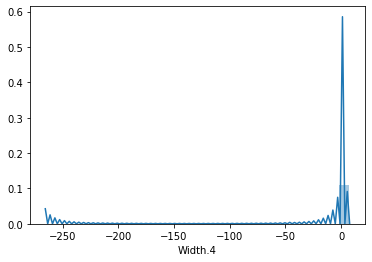

In [61]:
sns.distplot(dataS["Width.4"],bins=30)

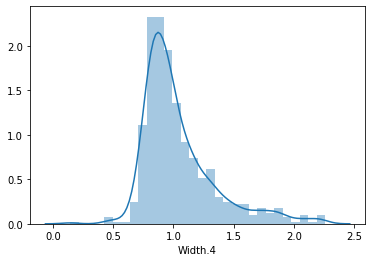

In [62]:
ms=(dataS["Width.4"]<2.3)&(dataS["Width.4"]>0)
dataS=dataS[ms]
sns.distplot(dataS["Width.4"],bins=30)

(61.74180558187195,
 148.79819441812805,
 -1.0150488574011365,
 20.615048857401142)

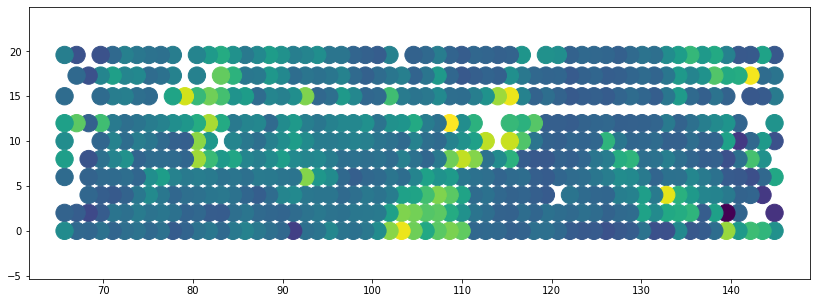

In [63]:
fig, ax = plt.subplots(figsize=(14,5))
plt.scatter(dataS.X,dataS.Y,c=dataS["Width.4"], s=300)
plt.axis('equal')

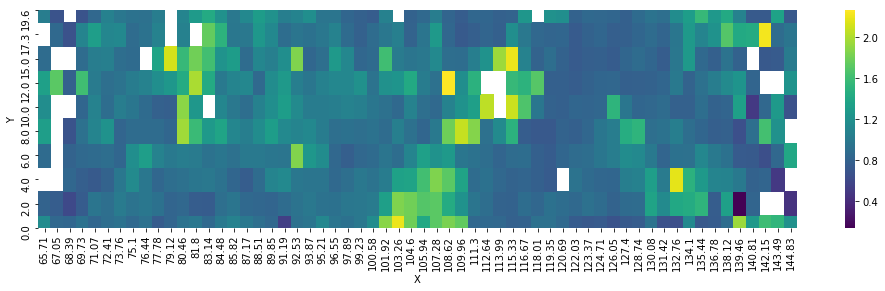

In [64]:
dataSw=(dataS.round(2)).pivot(index='Y', columns='X', values='Width.4')
fig, ax = plt.subplots(figsize=(17, 4))
sns.heatmap(dataSw, cmap="viridis")
plt.gca().invert_yaxis()

In [65]:
SigmaObsS=a*(dataS["Width.4"]/ln)*c
SigmaObsS

41      13.869216
42      26.403738
43      14.101337
44      14.062650
45      20.620062
          ...    
1446    16.016334
1447    18.028047
1448    16.035677
1449    16.441888
1450    22.418998
Name: Width.4, Length: 572, dtype: float64

In [66]:
SigmaTermS=np.sqrt(166.3*(T/10000)/(Sw*1.414))
SigmaTermS

1.750044272166352

In [67]:
SigmaDispS=np.sqrt(SigmaObsS**2-SigmaTermS**2-SigmaInstS**2)
SigmaDispS.describe()

count    509.000000
mean      13.282584
std        8.029429
min        0.405772
25%        7.513187
50%       11.361806
75%       17.063498
max       41.024785
Name: Width.4, dtype: float64

In [68]:
dataS=dataS.assign(SigmaD=SigmaDispS.values)
dataS.describe()

,X,Y,Center.4,Peak.4,Width.4,RV,SigmaD
count,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,509.000000
mean,105.604213,9.289685,6725.220965,174.901080,1.038671,-231.712825,13.282584
std,22.735199,6.268634,0.482538,203.333155,0.304655,21.491808,8.029429
min,65.710000,0.000000,6723.441000,-1343.000000,0.141000,-310.990806,0.405772
25%,85.820000,4.000000,6725.016750,44.025000,0.837750,-240.808372,7.513187
50%,105.940000,8.000000,6725.169500,120.050000,0.952500,-234.005029,11.361806
75%,125.045000,15.000000,6725.321250,237.775000,1.147250,-227.246226,17.063498
max,144.830000,19.600000,6731.423000,1568.000000,2.260000,44.520025,41.024785


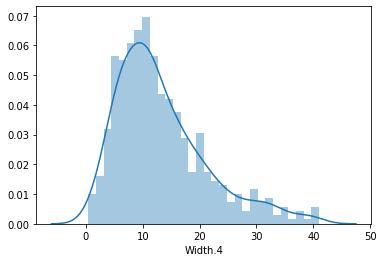

In [69]:
sns.distplot(SigmaDispS,bins=30)

(65, 145)

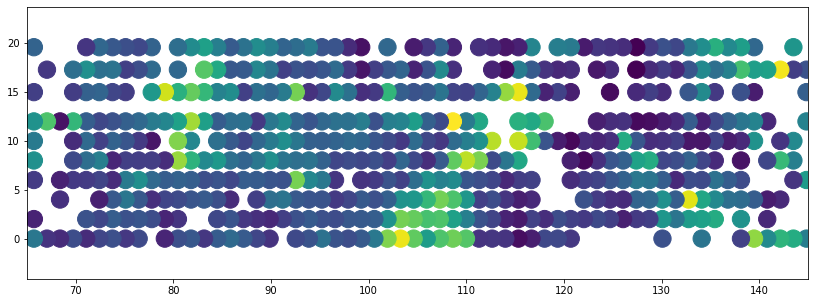

In [70]:
fig, ax = plt.subplots(figsize=(14,5))
plt.scatter(dataS.X,dataS.Y,c=dataS.SigmaD, s=300)
plt.axis('equal')
ax.set_xlim(65,145)

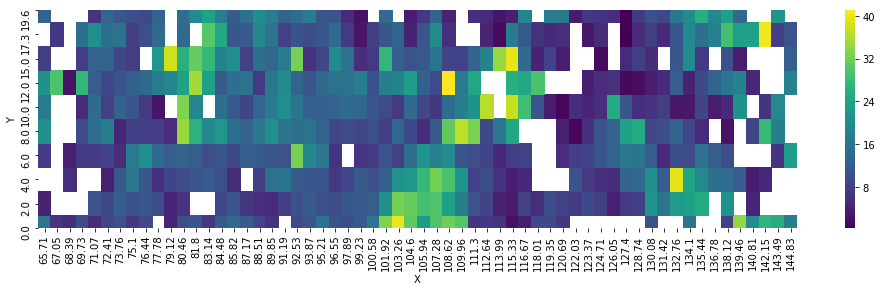

In [71]:
dataSsd=(dataS.round(2)).pivot(index='Y', columns='X', values='SigmaD')
fig, ax = plt.subplots(figsize=(17, 4))
sns.heatmap(dataSsd, cmap="viridis")
plt.gca().invert_yaxis()

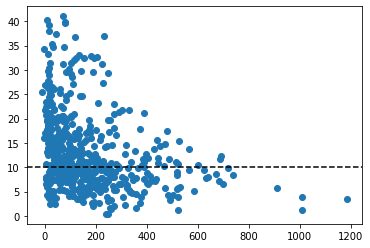

In [72]:
plt.scatter(dataS["Peak.4"],dataS.SigmaD)
plt.axhline(y=10, color='k', linestyle='--')